In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import cos, sin, atan, pi

## Epicycloid


$$\begin{align}
x(t) &= (R+r) \cdot cos(t) - r \cdot cos\left(\frac{R+r}{r} * t\right)\\
y(t) &= (R+r) \cdot sin(t) - r \cdot sin\left(\frac{R+r}{r} * t\right)
\end{align}$$
$$\text{with}$$
$$0 \leq t \leq 2\pi $$

In [2]:
def epi_xt(x, R, r):
	return (R+r) * cos(x) + r * cos((R+r) * x / r)

def epi_yt(y, R, r):
	return (R+r) * sin(y) + r * sin((R+r) * y / r)

x(t) = (50.417 + 4.583) * cos(t) - 10 * cos((50.417 + 4.583) * t/4.583)
y(t) = (50.417 + 4.583) * sin(t) - 10 * sin((50.417 + 4.583) * t/4.583)


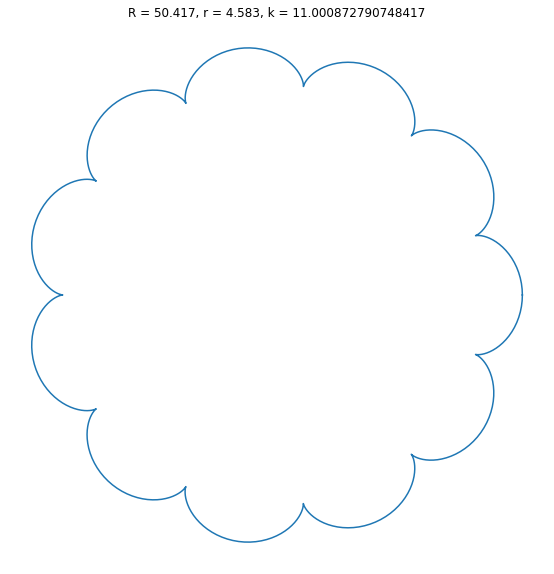

In [3]:
R = 50.417 # Radius (larger) static circle
r = 4.583 # Radius (smaller) rolling circle
print("x(t) = ({0} + {1}) * cos(t) - 10 * cos(({0} + {1}) * t/{1})".format(R, r))
print("y(t) = ({0} + {1}) * sin(t) - 10 * sin(({0} + {1}) * t/{1})".format(R, r))
xarr = np.linspace(0, 2*pi, 500)
yarr = xarr
xarr = [epi_xt(x, R, r) for x in xarr]
yarr = [epi_yt(y, R, r) for y in yarr]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(xarr,yarr)
circle1 = plt.Circle((0,0), radius=R, color='r', fill=False)
# circle2 = plt.Circle((0,0), radius=R+2*r, color='r', fill=False)
# ax.add_patch(circle1)
# ax.add_patch(circle2)
plt.gca().set_aspect('equal')
ax.set_title("R = {0}, r = {1}, k = {2}".format(R, r, (R/r)))
plt.axis("off")
plt.savefig("epi.svg")
plt.show()

## Hypocycloid

$$\begin{align}
x(t) &= (R-r) \cdot cos(t) + r \cdot cos\left(\frac{R-r}{r} * t\right)\\
y(t) &= (R-r) \cdot sin(t) - r \cdot sin\left(\frac{R-r}{r} * t\right)
\end{align}$$
$$\text{with}$$
$$0 \leq t \leq 2\pi $$

In [4]:
def hypo_xt(t, R, r):
	return (R-r) * cos(t) + r * cos((R-r) * t/r)

def hypo_yt(t, R, r):
	return (R-r) * sin(t) - r * sin((R-r) * t/r)

x(t) = (100 - 10) * cos(t) + 10 * cos((100 - 10) * t/10)
y(t) = (100 - 10) * sin(t) - 10 * sin((100 - 10) * t/10)


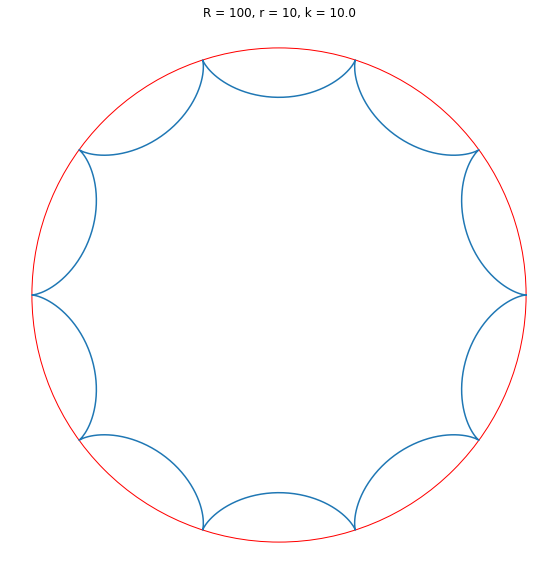

In [5]:
R, r = 100, 10
print("x(t) = ({0} - {1}) * cos(t) + 10 * cos(({0} - {1}) * t/{1})".format(R, r))
print("y(t) = ({0} - {1}) * sin(t) - 10 * sin(({0} - {1}) * t/{1})".format(R, r))
xarr = np.linspace(0, 2*pi, 500)
yarr = xarr
xarr = [hypo_xt(x, R, r) for x in xarr]
yarr = [hypo_yt(y, R, r) for y in yarr]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(xarr,yarr)
outer_circ = plt.Circle((0,0), radius=R, color='r', fill=False)
ax.add_patch(outer_circ)
plt.gca().set_aspect('equal')
ax.set_title("R = {0}, r = {1}, k = {2}".format(R, r, (R/r)))
plt.axis("off")
plt.show()

$$\begin{align}
x(\phi) &= R_R \cdot cos(\phi) - R_r \cdot cos(\phi + \psi) - E \cdot cos(Z_2 \cdot \phi)\\
y(\phi) &= -R_R \cdot sin(\phi) + R_r \cdot sin(\phi + \psi) + E \cdot sin(Z_2 \cdot \phi)\\
\\
\psi(\phi) &= arctan\left[ \frac{sin(1 - Z_2)}{\frac{R_R}{E \cdot Z_2} - cos(1-Z_2) \cdot \phi} \right]
\end{align}$$

In [6]:
def disk_x(phi, R_R, R_r, E, Z):
	x = R_R * np.cos(phi) - R_r * np.cos(phi + (np.arctan((np.sin(1 - Z) * phi)/((R_R/(E * Z)) - np.cos(1-Z) * phi)))) - E * np.cos(Z * phi)
	return x

def disk_y(phi, R_R, R_r, E, Z):
	y = -R_R * np.sin(phi) + R_r * np.sin(phi + (np.arctan((np.sin(1 - Z) * phi)/((R_R/(E * Z)) - np.cos(1-Z) * phi)))) + E * np.sin(Z * phi)
	return y

def psi(phi, Z, R_R, E):
	psi = -atan((sin(1 - Z) * phi)/((R_R/(E * Z)) - cos(1-Z) * phi))
	return psi

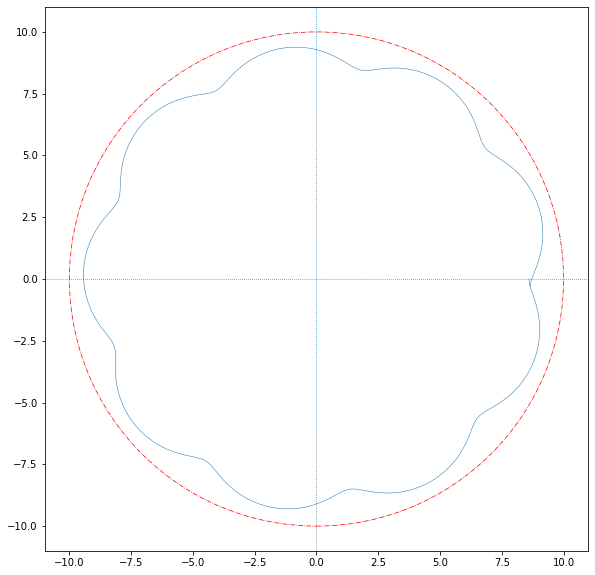

In [7]:
R_R = 10 # distance center of fixed pins circle - center of input shaft i.e. radius circle connecting all ring gear bearings
R_r = 1 # radius single fixed pin
E = 0.4 #  eccentricity
Z = 10 # number of fixed pins

xarr = np.linspace(0, 2*pi, 500)
yarr = xarr
xarr = [disk_x(x, R_R, R_r, E, Z) for x in xarr]
yarr = [disk_y(y, R_R, R_r, E, Z) for y in yarr]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(xarr,yarr, lw=.5)
ax.axhline(0, lw=.75, ls=':')
ax.axvline(0, lw=.75, ls=':')
ring_gear_circ = plt.Circle((0,0), radius=R_R, linestyle='dashdot', lw=.75, color='r', fill=False)
ax.add_patch(ring_gear_circ)
plt.gca().set_aspect('equal')
ax.set_xlim(-(R_R+R_r),(R_R+R_r))
ax.set_ylim(-(R_R+R_r),(R_R+R_r))
# ax.axvline(8.305)
# ax.axvline(-8.305)
# ax.set_title("R = {0}, r = {1}, k = {2}".format(R, r, (R/r)))
# plt.axis("off")
plt.show()

## Epitrochoid
https://doi.org/10.1016/j.mechmachtheory.2021.104399  
\cite{Lee.2020}

$$\begin{align}
x(t) &= (R+r) \cdot cos(t) - d \cdot cos\left(\frac{R+r}{r} \cdot t\right)\\
y(t) &= (R+r) \cdot sin(t) - d \cdot sin\left(\frac{R+r}{r} \cdot t\right)
\end{align}$$
$$\text{with}$$
$$0 \leq t \leq 2\pi $$

In [8]:
# Epitrochoid
def epi_xt(x, R, r, d):
	return (R+r) * cos(x) - d * cos((R+r) * x / r)

def epi_yt(y, R, r, d):
	return (R+r) * sin(y) - d * sin((R+r) * y / r)

In [9]:
# First derivative - Epitrochoid
def epi_xt_dxdt(x, R, r, d):
	return -(R+r) * sin(x) + d * ((R+r)/r) * sin((R+r) * x / r)

def epi_yt_dydt(y, R, r, d):
	return (R+r) * cos(y) - d * ((R+r)/r) * cos((R+r) * y / r)

In [10]:
# Equidistant curves
def eqd_xt(t, R, r, d, h):
	return (R+r) * cos(t) - d * cos((R+r) * t/r) - (h * (r * cos(t) - d * cos((R+r) * t/r)) / np.sqrt(d**2 - 2 * d * r * cos(R * t/r) + r**2))

def eqd_yt(t, R, r, d, h):
	return (R+r) * sin(t) - d * sin((R+r) * t/r) + (h * (-r * sin(t) + d * sin((R+r) *  t/r)) / np.sqrt(d**2 - 2 * d * r * cos(R * t/r) + r**2))

$$\begin{align}
x_D(t) &= (R+r)cos(t) - d \cdot cos\left(\frac{R+r}{r}t\right) - \frac{h\left(r \cdot cos(t) - d \cdot cos\left(\frac{R+r}{r}t\right)\right)}{\sqrt{d^2 - 2dr \cdot cos\left(\frac{R}{r}t\right) + r^2}}\\
\\
y_D(t) &= (R+r)sin(t) - d \cdot sin\left(\frac{R+r}{r}t\right) + \frac{h\left(-r \cdot sin(t) + d \cdot sin\left(\frac{R+r}{r}t\right)\right)}{\sqrt{d^2 - 2dr \cdot cos\left(\frac{R}{r}t\right) + r^2}}
\end{align}$$

In [11]:
r = 3 # Radius (smaller) rolling circle
Z = 30 # no. of lopes
d = 2 # distance center of rolling circle to traced point
h = 6 # distance to offset equidistant curve
R = Z * r # base circle diameter
# R = 100 # Radius (larger) base circle

xt = np.linspace(0, 2*pi, Z*30)
yt = xt
eqdist_xt = [eqd_xt(x, R, r, d, h) for x in xt]
eqdist_yt = [eqd_yt(y, R, r, d, h) for y in yt]
xt, yt = [epi_xt(x, R, r, d) for x in xt], [epi_yt(y, R, r, d) for y in yt]
r_t = R+r+d-h
r_r = R+r-d-h
r_p = R+r-h
# dxdt, dydt = [epi_xt_dxdt(x, R, r, d) for x in xt], [epi_yt_dydt(y, R, r, d) for y in yt]
# eqdist_yt = [eqdist_epi_yt(y, dxdt[i], dydt[i], h) for i, y in enumerate(yt)]
print("Eccentricity:\t\t", h)
print("Pin roller diameter:\t", (h+d))
print("Pitch circle diameter:\t", 2*r_p)
print("\nCopy/pastable parametric equations below:")
print("({0} + {1}) * cos(t) - {2} * cos(({0} + {1}) * t/{1}) - ({3} * ({1} * cos(t) - {2} * cos(({0} + {1}) * t/{1})) / SQRT({2}^2 - 2 * {2} * {1} * cos({0} * t/{1}) + {1}^2))".format(R, r, d, h))
print("({0} + {1}) * sin(t) - {2} * sin(({0} + {1}) * t/{1}) + ({3} * (-{1} * sin(t) + {2} * sin(({0} + {1}) * t/{1})) / SQRT({2}^2 - 2 * {2} * {1} * cos({0} * t/{1}) + {1}^2))".format(R, r, d, h))

Eccentricity:		 6
Pin roller diameter:	 8
Pitch circle diameter:	 174

Copy/pastable parametric equations below:
(90 + 3) * cos(t) - 2 * cos((90 + 3) * t/3) - (6 * (3 * cos(t) - 2 * cos((90 + 3) * t/3)) / SQRT(2^2 - 2 * 2 * 3 * cos(90 * t/3) + 3^2))
(90 + 3) * sin(t) - 2 * sin((90 + 3) * t/3) + (6 * (-3 * sin(t) + 2 * sin((90 + 3) * t/3)) / SQRT(2^2 - 2 * 2 * 3 * cos(90 * t/3) + 3^2))


In [12]:
i = 0
theta = 0
for x,y in zip(eqdist_xt, eqdist_yt):
	i += 1
	if r_p - np.sqrt(x**2 + y**2) < 0.001:
		theta = 2*pi*(i/(Z*30))
w_t = 2*r_p*np.sin((pi/Z)-theta) # Thickness of a single tooth
w_s = 2*r_p*np.sin(theta) # width of the space between two tooths
delta = w_t / (w_t + w_s)

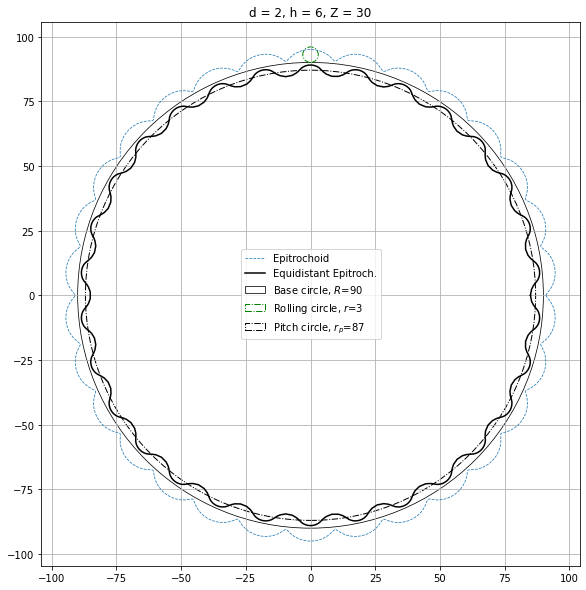

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(xt,yt, lw=.75, ls='--', label="Epitrochoid")
ax.plot(eqdist_xt, eqdist_yt, color='black', lw=1.5, label="Equidistant Epitroch.")

base_circle = plt.Circle((0,0), radius=R, color='black', lw=.75, fill=False, label="Base circle, $R$={}".format(R))
rolling_circle = plt.Circle((0,R+r), radius=r, ls='dashdot', color='g', fill=False, label="Rolling circle, $r$={}".format(r))
pitch_circle = plt.Circle((0,0), radius=(r_p), ls='dashdot', lw=1, fill=False, label="Pitch circle, $r_p$={}".format(r_p))
ax.add_patch(base_circle)
ax.add_patch(rolling_circle)
ax.add_patch(pitch_circle)
plt.gca().set_aspect('equal')
ax.set_title("d = {0}, h = {1}, Z = {2}".format(d, h, Z))
ax.legend()
plt.grid()
# plt.axis("off")
plt.savefig("epi.svg")
plt.show()

In [14]:
r = 1.5 # Radius (smaller) rolling circle
Z = 29
d = 1 # distance center of rolling circle and traced point
h = 3
R = (Z * r)
# R = 100 # Radius (larger) base circle

xt2 = np.linspace(0, 2*pi, Z*30)
yt2 = xt2
eqdist_xt2 = [eqd_xt(x, R, r, d, h)+.5 for x in xt2]
eqdist_yt2 = [eqd_yt(y, R, r, d, h) for y in yt2]
# xt2, yt2 = [epi_xt(x, R, r, d) for x in xt2], [epi_yt(y, R, r, d) for y in yt2]
print("Eccentricity:\t\t", h)
print("Pin roller diameter:\t", (h+d)*2)
print("Pitch circle diameter:\t", 2*r_p)
print("Copy/pastable parametric equations below:")
print("({0}+{1}) * cos(t) - {2} * cos(({0}+{1}) * t/{1}) - ({3} * ({1} * cos(t) -{2} * cos(({0}+{1}) * t/{1})) / SQRT({2}^2 - 2 *{2}* {1} * cos({0} * t/{1}) + {1}^2))".format(R, r, d, h))
print("({0}+{1}) * sin(t) - {2} * sin(({0}+{1}) * t/{1}) + ({3} * (-{1} * sin(t) +{2} * sin(({0}+{1}) * t/{1})) / SQRT({2}^2 - 2 *{2}* {1} * cos({0} * t/{1}) + {1}^2))".format(R, r, d, h))

Eccentricity:		 3
Pin roller diameter:	 8
Pitch circle diameter:	 174
Copy/pastable parametric equations below:
(43.5+1.5) * cos(t) - 1 * cos((43.5+1.5) * t/1.5) - (3 * (1.5 * cos(t) -1 * cos((43.5+1.5) * t/1.5)) / SQRT(1^2 - 2 *1* 1.5 * cos(43.5 * t/1.5) + 1.5^2))
(43.5+1.5) * sin(t) - 1 * sin((43.5+1.5) * t/1.5) + (3 * (-1.5 * sin(t) +1 * sin((43.5+1.5) * t/1.5)) / SQRT(1^2 - 2 *1* 1.5 * cos(43.5 * t/1.5) + 1.5^2))


436.0


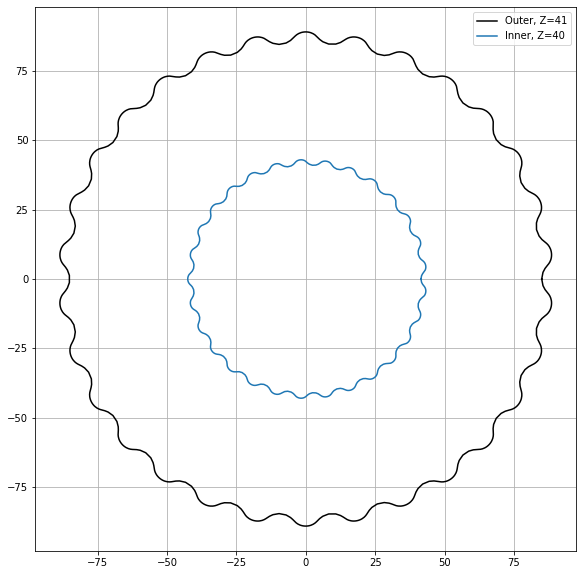

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
# ax.plot(xt,yt, lw=.75, ls='--', label="Epitrochoid")
ax.plot(eqdist_xt, eqdist_yt, color='black', lw=1.5, label="Outer, Z=41")
# ax.plot(xt2,yt2, lw=.75, ls='--', label="Epitrochoid")
ax.plot(eqdist_xt2, eqdist_yt2, lw=1.5, label="Inner, Z=40")

plt.gca().set_aspect('equal')
# ax.set_title("d = {0}, h = {1}, Z = {2}".format(d, h, Z))
# plt.savefig("epi.svg")
# ax.vlines(eqdist_xt[(len(eqdist_xt)/2)+1], eqdist_xt2[(len(eqdist_xt2)/2)+1])
print((len(eqdist_xt2)/2)+1)
ax.legend()
plt.grid()
# plt.axis("off")
# plt.savefig("epi2.svg")
plt.show()